<a href="https://colab.research.google.com/github/vitroid/genice-mdanalysis/blob/main/Jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To run it on the Google Colab,

# Install version 2.1beta of GenIce
!pip install GenIce2

# Install the newest (dev) version of MDAnalysls from source
! git clone https://github.com/MDAnalysis/MDAnalysis.git
! cd MDAnalysis/package; ./setup.py install

# And install genice2-mdanalysis plugin from PyPI
!pip install genice2-mdanalysis

exit()

In [1]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("CS1") 
formatter  = Format("mdanalysis")
water      = Molecule("spce")
guests = {"12": {"ch4":1.0},               # Fill 100% of 12-hedral cages with methanes.
          "14": {"thf": 0.5, "H2": 0.5}}  # Fill 50% of 14-hedral cages with THFs and 50% with hydrogens.
# Make the MDAnalysis universe.
u = GenIce(lattice, rep=(2,2,2)).generate_ice(water, formatter, guests=guests)
u

/Users/matto/venvs/genice2arm3/lib/python3.9/site-packages/MDAnalysis-2.0.0.dev0-py3.9-macosx-11-arm64.egg/MDAnalysis/core/universe.py:437: UserWarning: Segments specified but no segment_resindex given.  All residues will be placed in first Segment
  warnings.warn(


<Universe with 1544 atoms>

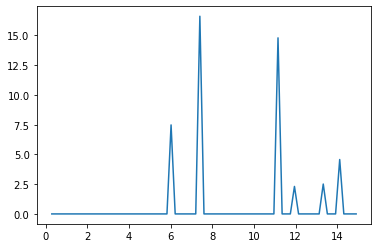

In [5]:
from MDAnalysis.analysis.rdf import InterRDF
g1 = u.select_atoms("name O")
rdf = InterRDF(g1, g1, nbins=75, range=(0.2, 15.0))
rdf.run()

from matplotlib import pyplot as plt
plt.plot(rdf.bins, rdf.rdf)

In [2]:
# Save as a .gro file.
allatoms = u.select_atoms("all")
allatoms.write("CS1_mdanalysis.gro")

In [ ]:
# nglview is not available on Google Colaboratory.
import nglview as nv

sol_view = nv.show_mdanalysis(u)
sol_view.add_representation('ball+stick', selection='all')
sol_view.center()
sol_view

NGLWidget()